# **Sentiment Analysis**

## **Imports**

In [10]:
from germansentiment import SentimentModel
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import shutil

# **Config**

In [11]:
INPUT_DIRECTORY = "../1 data_preprocessing/output"

## **Sentiment**

### German Sentiment Model

https://huggingface.co/oliverguhr/german-sentiment-bert?text=Da+sisrt+super

## **Sentiment Functions**

In [12]:
def analyze_manifesto_sentiment(manifesto_path, party="NaN"):
    nlp = spacy.load("de_core_news_sm")
    
    with open(manifesto_path, 'r', encoding='utf-8') as file:
        manifesto_text = file.read()

    # Teile den Text in Abschnitte auf
    sections = manifesto_text.split('. ')  

    data = {'Section': [], 'Sentiment': [], 'Score': []}

    model = SentimentModel() 

    for section in sections:
        pred_class, probabilities = model.predict_sentiment([section], output_probabilities=True)
        max_probability = max(probabilities[0], key=lambda x: x[1])[1]

        data['Section'].append(section)
        data['Sentiment'].append(pred_class[0])
        data['Score'].append(max_probability)

    df_sections = pd.DataFrame(data)
    df_sections.to_csv(f'./sentiments/{party}_sentiment_results.csv', index=False)

    print(f"Sentiment for [{manifesto_path}] analized!")

    return df_sections

def plot_sentiment_distribution(df):
    sentiment_counts = df['Sentiment'].value_counts()

    plt.figure(figsize=(8, 6))
    sentiment_counts.plot(kind='bar', color='skyblue')
    plt.title('Sentiment Distribution')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## **CDU CSU**

Sentiment for [../1 data_preprocessing/output/CDU-CSU.txt] analized!


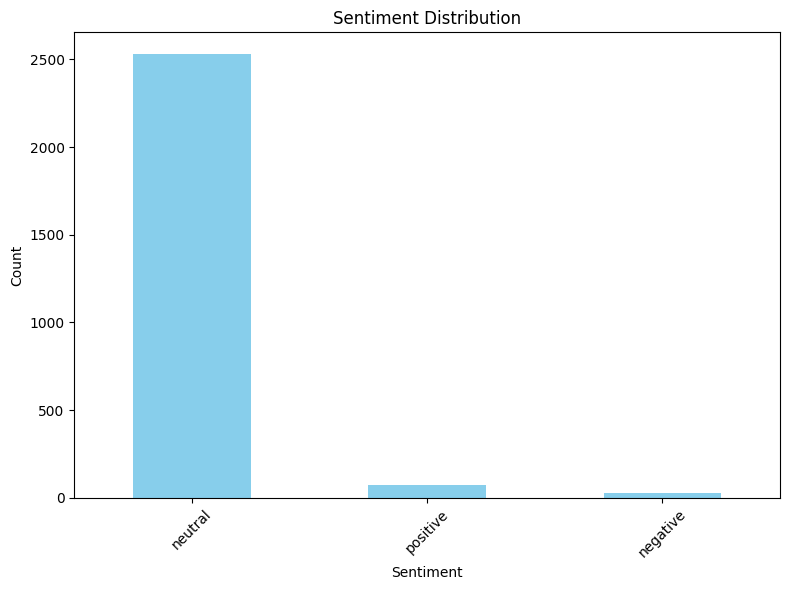

In [13]:
cdu_sentiment = analyze_manifesto_sentiment(f"{INPUT_DIRECTORY}/CDU-CSU.txt", "cdu_csu")
plot_sentiment_distribution(cdu_sentiment)

## **SPD**

Sentiment for [../1 data_preprocessing/output/SPD.txt] analized!


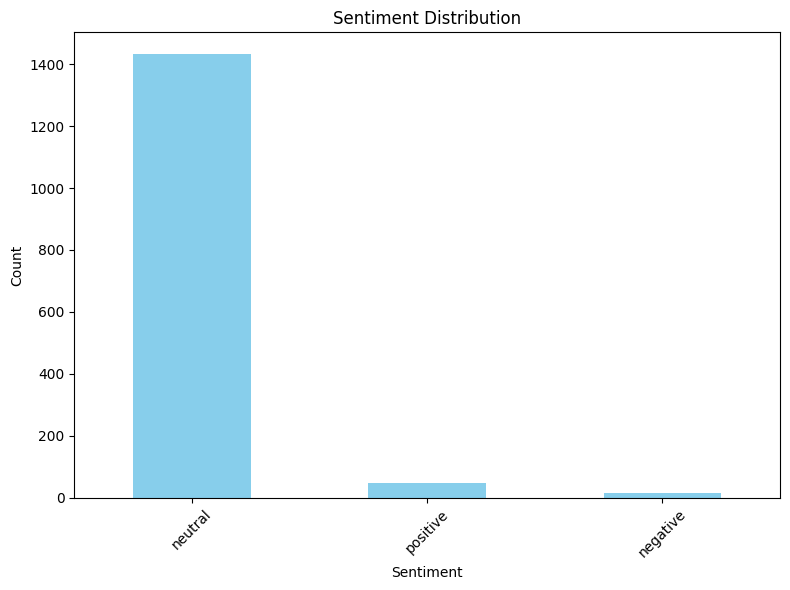

In [14]:
spd_sentiment = analyze_manifesto_sentiment(f"{INPUT_DIRECTORY}/SPD.txt", "spd")
plot_sentiment_distribution(spd_sentiment)

## **Die Grünen**

Sentiment for [../1 data_preprocessing/output/DIE_GRUENEN.txt] analized!


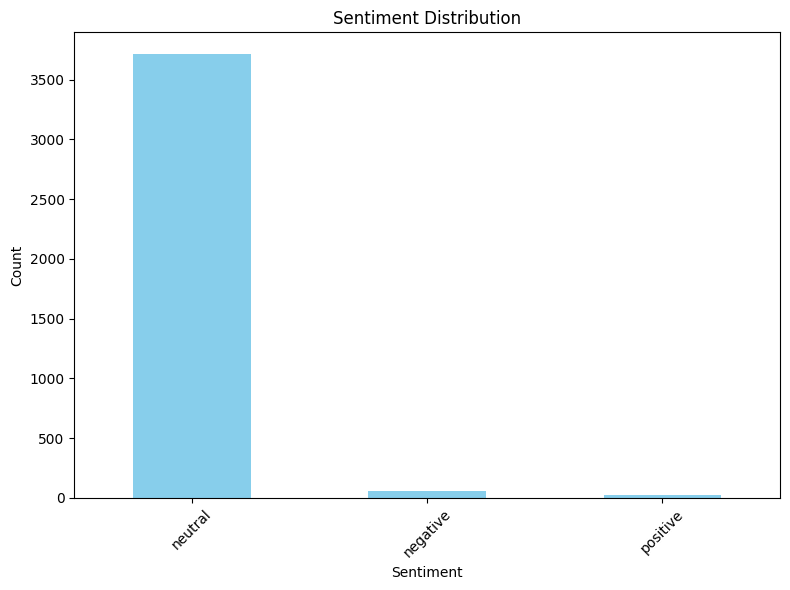

In [15]:
gruen_sentiment = analyze_manifesto_sentiment(f"{INPUT_DIRECTORY}/DIE_GRUENEN.txt", "gruene")
plot_sentiment_distribution(gruen_sentiment)

## **FDP**

Sentiment for [../1 data_preprocessing/output/FDP.txt] analized!


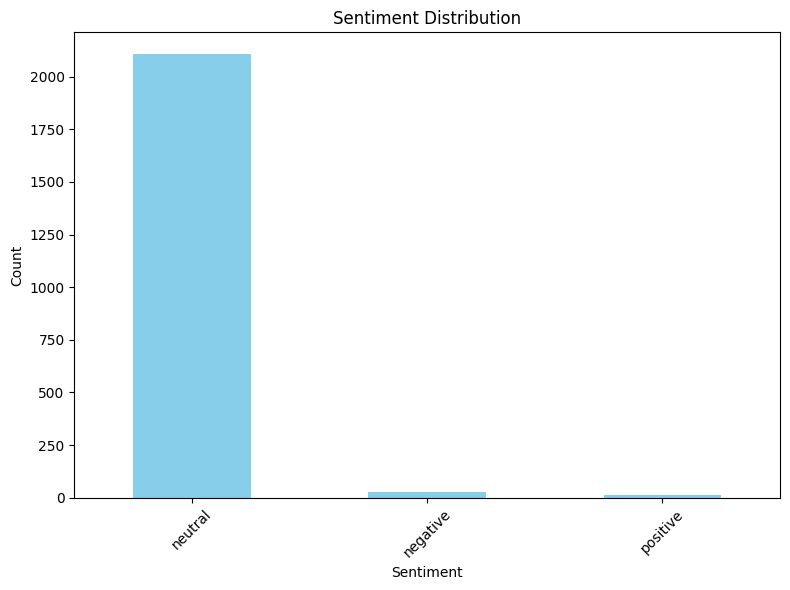

In [16]:
fdp_sentiment = analyze_manifesto_sentiment(f"{INPUT_DIRECTORY}/FDP.txt", "fdp")
plot_sentiment_distribution(fdp_sentiment)

## **AFD**

Sentiment for [../1 data_preprocessing/output/AFD.txt] analized!


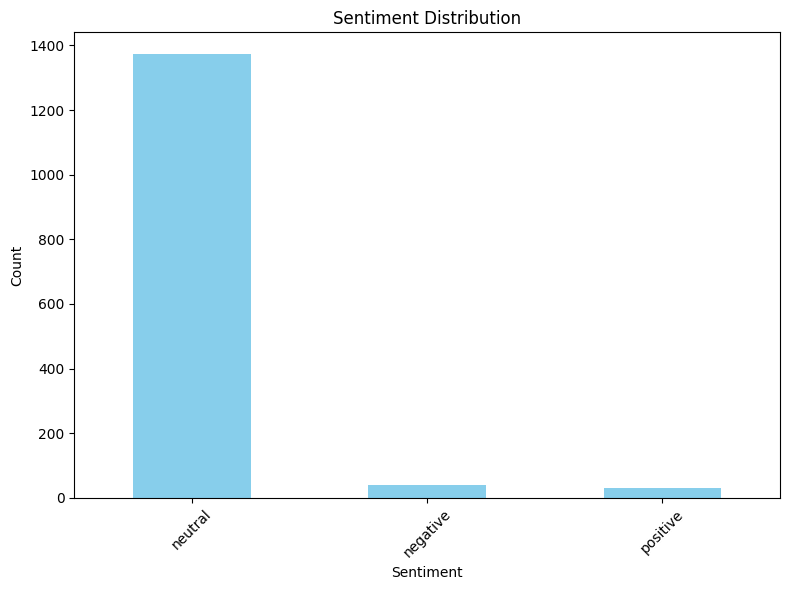

In [17]:
afd_sentiment = analyze_manifesto_sentiment(f"{INPUT_DIRECTORY}/AFD.txt", "afd")
plot_sentiment_distribution(afd_sentiment)

## **Linke**

Sentiment for [../1 data_preprocessing/output/DIE_LINKE.txt] analized!


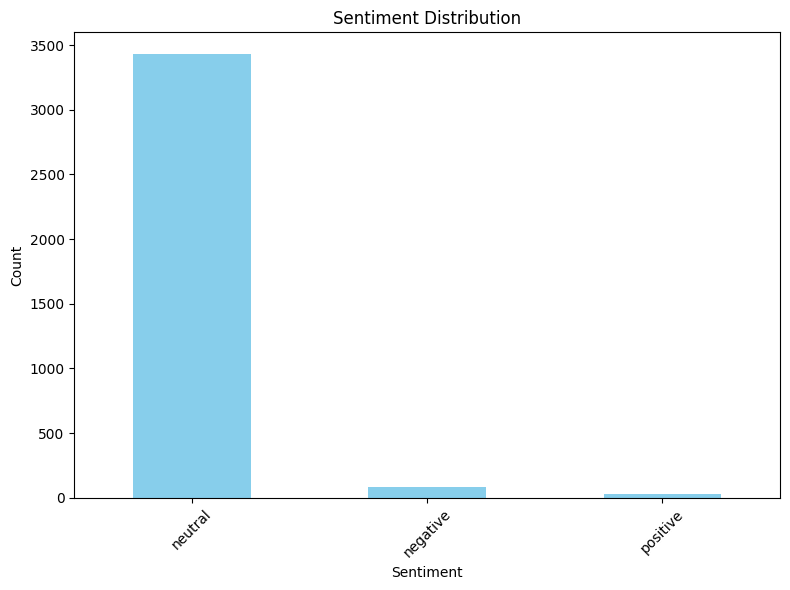

In [18]:
linke_sentiment = analyze_manifesto_sentiment(f"{INPUT_DIRECTORY}/DIE_LINKE.txt", "die_linke")
plot_sentiment_distribution(linke_sentiment)

## **Sentiment characteristics**

In [19]:
def sentiment_characteristics(dataframes:list, parties:list):

    pos_scores = []
    neg_scores = []
    total_sections_overall = []
    
    for df in dataframes:
        sentiment_counts = df['Sentiment'].value_counts()
        sections_total = len(df)
        # 0 -> neutral, 1 -> pos, 2 -> neg
        pos_score = round((sentiment_counts[1] / (sections_total)) * 100,2 )
        neg_score = round((sentiment_counts[2] / (sections_total)) * 100,2 )

        pos_scores.append(pos_score)
        neg_scores.append(neg_score)
        total_sections_overall.append(sections_total)

    sizes = [size / 10 for size in total_sections_overall]

    plt.figure(figsize=(10, 6))
    plt.scatter(pos_scores, neg_scores, color='blue', s=sizes)

    for i, party in enumerate(parties):
        plt.annotate(party, (pos_scores[i], neg_scores[i]), textcoords="offset points", xytext=(0,5), ha='center')

    plt.title('Positiv vs Negativ Sentiment')
    plt.xlabel('Positiv (%)')
    plt.ylabel('Negativ (%)')
    plt.grid(True)
    plt.show()
    
    # csv expoort
    results_df = pd.DataFrame({'Partei': parties, 'Positiv': pos_scores, 'Negativ': neg_scores})

    # Save to CSV
    results_df.to_csv('./sentiments/sentiment_characteristics.csv', index=False)




/var/folders/zv/gtw8z_g16b3djwvggjhnj_h40000gn/T/ipykernel_64768/733585263.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pos_score = round((sentiment_counts[1] / (sections_total)) * 100,2 )
/var/folders/zv/gtw8z_g16b3djwvggjhnj_h40000gn/T/ipykernel_64768/733585263.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  neg_score = round((sentiment_counts[2] / (sections_total)) * 100,2 )
/var/folders/zv/gtw8z_g16b3djwvggjhnj_h40000gn/T/ipykernel_64768/733585263.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (cons

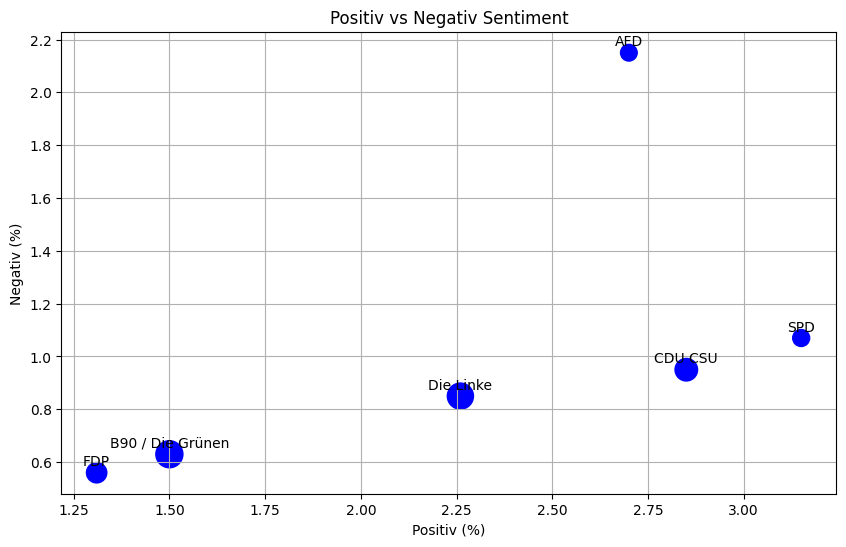

In [20]:
sentiment_dfs = [
    cdu_sentiment,
    spd_sentiment,
    gruen_sentiment,
    fdp_sentiment,
    afd_sentiment,
    linke_sentiment
]

parties = [
    "CDU CSU",
    "SPD",
    "B90 / Die Grünen",
    "FDP",
    "AFD",
    "Die Linke"
]

sentiment_characteristics(sentiment_dfs, parties)

In [22]:
# Copy folder into react frontend src folder so that react can access the data
shutil.copytree('./sentiments', '../../frontend/src/pages/charts/data/sentiments', dirs_exist_ok=True)

'../../frontend/src/pages/charts/data/sentiments'